In [1]:
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
#Matplot Images
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer 
from tensorflow.keras.initializers import he_normal
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers
#PreTrained Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import Xception
#Image Generator DataAugmentation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove 
import warnings 
warnings.filterwarnings("ignore")
#Splitting Data 
# import splitfolders
from keras.regularizers import l2

In [38]:
directory = "C:\\Users\\hosse\\OneDrive\\Desktop\\Bachclor_Project\\flower_images"

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)
    
    imgs = os.listdir(f_path)
    
    for img in imgs:
        
        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)
        
#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [39]:
df_train


filepath  label
0     C:\Users\hosse\OneDrive\Desktop\Bachclor_Proje...  Lilly
1     C:\Users\hosse\OneDrive\Desktop\Bachclor_Proje...  Lilly
2     C:\Users\hosse\OneDrive\Desktop\Bachclor_Proje...  Lilly
3     C:\Users\hosse\OneDrive\Desktop\Bachclor_Proje...  Lilly
4     C:\Users\hosse\OneDrive\Desktop\Bachclor_Proje...  Lilly
...                                                 ...    ...
4995  C:\Users\hosse\OneDrive\Desktop\Bachclor_Proje...  Tulip
4996  C:\Users\hosse\OneDrive\Desktop\Bachclor_Proje...  Tulip
4997  C:\Users\hosse\OneDrive\Desktop\Bachclor_Proje...  Tulip
4998  C:\Users\hosse\OneDrive\Desktop\Bachclor_Proje...  Tulip
4999  C:\Users\hosse\OneDrive\Desktop\Bachclor_Proje...  Tulip

[5000 rows x 2 columns]

Data Spliting


In [40]:
# Spliting in Train and Dummy 
train_df , dummy_df = train_test_split(df_train ,train_size = 0.8 , shuffle = True ,random_state = 42 )
# Spliting in Validation and Test From Dummy 
valid_df , test_df = train_test_split(dummy_df ,test_size= 0.5 , shuffle = True ,random_state = 42)

In [41]:
print(f"The shape of The Train data is: {train_df.shape}")
print(f"The shape of The Validation data is: {valid_df.shape}")
print(f"The shape of The Test data is: {test_df.shape}")

The shape of The Train data is: (4000, 2)
The shape of The Validation data is: (500, 2)
The shape of The Test data is: (500, 2)


Making Train Test And Validation Datasets

In [42]:
# Create ImageDataGenerator instances for  Train , validation and test sets (only rescale pixel values)
train_datagen = ImageDataGenerator(rescale=1./255,)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Flow images from dataframes and apply augmentation (if any)
print("Training Data")
train_ds = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filepath',    
    y_col='label',        
    target_size=(224, 224), 
    batch_size=batch_size,
    class_mode='categorical' 
)

print("Validation Data")
validation_ds = validation_datagen.flow_from_dataframe(
    valid_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

print("Test Data")
test_ds = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Training Data
Found 4000 validated image filenames belonging to 5 classes.
Validation Data
Found 500 validated image filenames belonging to 5 classes.
Test Data
Found 500 validated image filenames belonging to 5 classes.


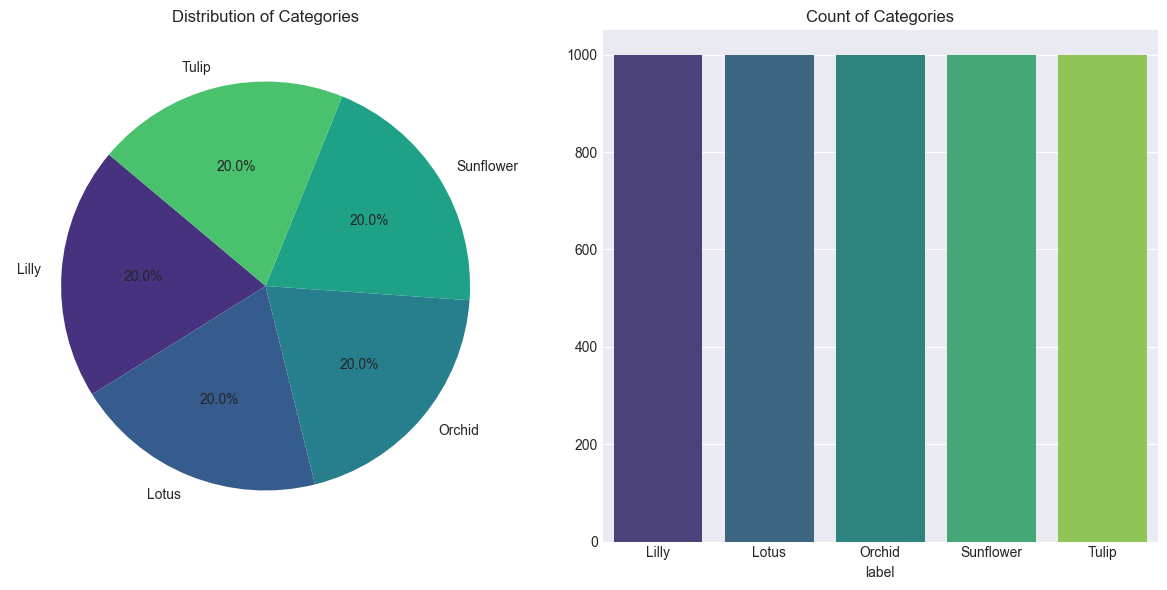

In [43]:
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [44]:
def visualize_images(path, num_images=5):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)
    
    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))
    
    # Create a figure and axis object to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')
    
    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)
        
        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_filename)  # Set image filename as title
    
    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

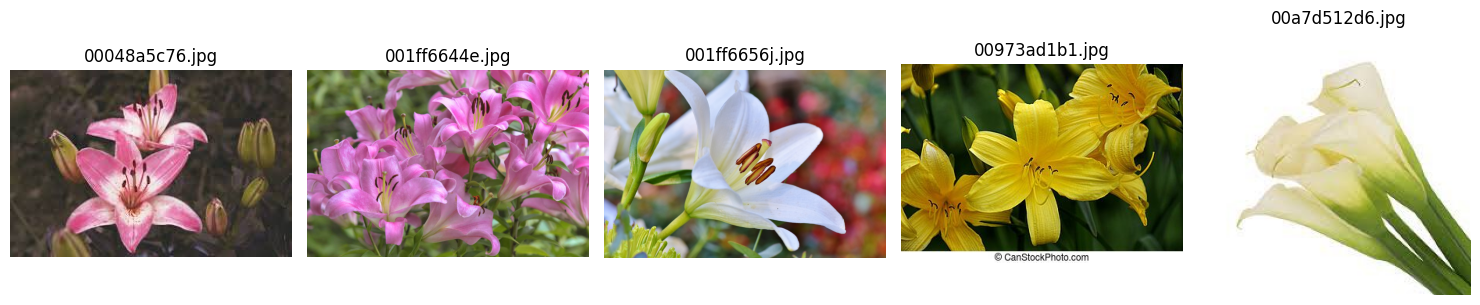

In [10]:
path_to_visualize = "C:\\Users\\hosse\\OneDrive\\Desktop\\Bachclor_Project\\flower_images\\lilly"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

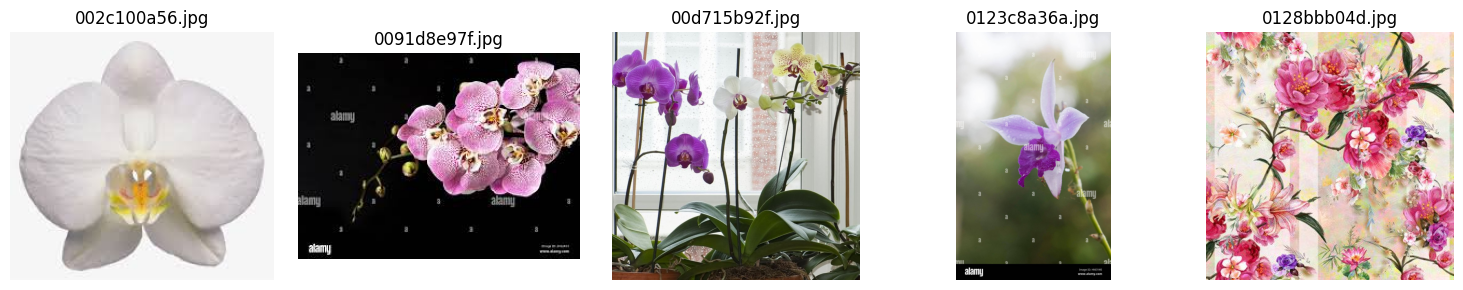

In [11]:
# Specify the path containing the images to visualize
path_to_visualize = "C:\\Users\\hosse\\OneDrive\\Desktop\\Bachclor_Project\\flower_images\\Orchid"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

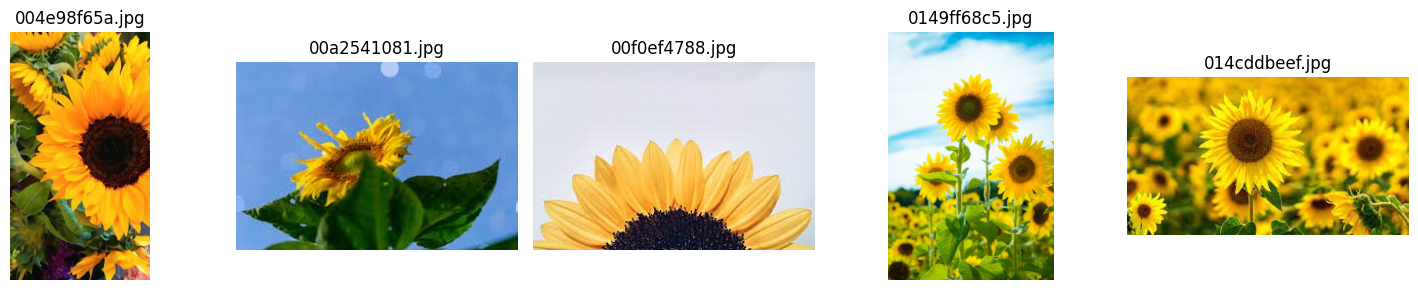

In [12]:
path_to_visualize = "C:\\Users\\hosse\\OneDrive\\Desktop\\Bachclor_Project\\flower_images\\sunflower"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

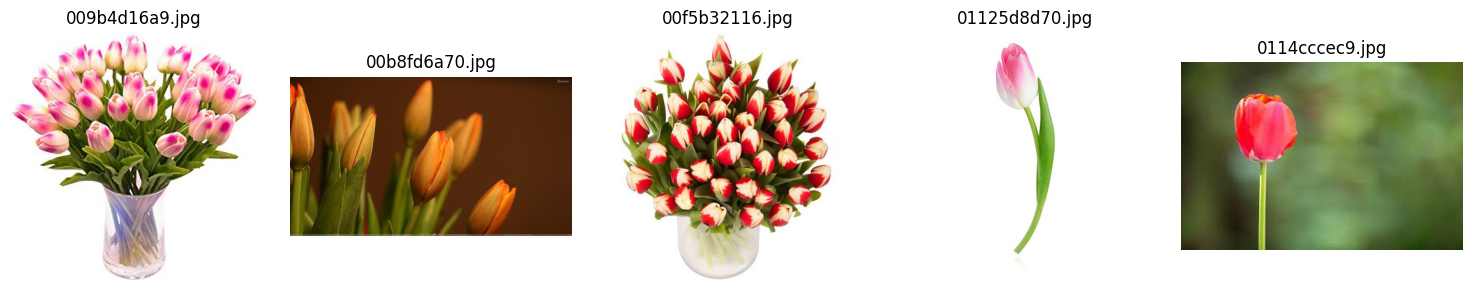

In [13]:
# Specify the path containing the images to visualize
path_to_visualize = "C:\\Users\\hosse\\OneDrive\\Desktop\\Bachclor_Project\\flower_images\\tulip"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

In [45]:
# Load the DenseNet121 base model without the top (classification) layer
from tensorflow.keras.applications import DenseNet121
base_model = DenseNet121(weights='imagenet', include_top=False, pooling='max', input_shape=(224, 224, 3))

# Freeze the layers in the base model
base_model.trainable = False

# Build Model 
model = Sequential()

# Base Model 
model.add(base_model)

# Batch Normalization
model.add(BatchNormalization())

# Dense Layer 1
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01),
               ))

# Batch Normalization
model.add(BatchNormalization())

# Dropout Layer
model.add(Dropout(0.5)) 

# Output Layer
model.add(Dense(5, activation='softmax'))

# Compile
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 batch_normalization_6 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 batch_normalization_7 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                

In [46]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#Fitting Model
history = model.fit(train_ds,
                        epochs= 20,
#                         steps_per_epoch = len(train_ds),
                        validation_data = validation_ds,
#                         validation_steps = len(validation_ds),
                        callbacks = early_stopping)

Epoch 1/20
125/125 [==============================] - 140s 1s/step - loss: 4.1555 - accuracy: 0.6948 - val_loss: 3.2405 - val_accuracy: 0.8480
Epoch 2/20
125/125 [==============================] - 133s 1s/step - loss: 3.0118 - accuracy: 0.8380 - val_loss: 2.6832 - val_accuracy: 0.8920
Epoch 3/20
125/125 [==============================] - 133s 1s/step - loss: 2.5536 - accuracy: 0.8813 - val_loss: 2.3554 - val_accuracy: 0.9060
Epoch 4/20
125/125 [==============================] - 132s 1s/step - loss: 2.2053 - accuracy: 0.9087 - val_loss: 2.0857 - val_accuracy: 0.9040
Epoch 5/20
125/125 [==============================] - 129s 1s/step - loss: 1.9487 - accuracy: 0.9172 - val_loss: 1.8461 - val_accuracy: 0.9220
Epoch 6/20
125/125 [==============================] - 121s 971ms/step - loss: 1.7209 - accuracy: 0.9370 - val_loss: 1.6712 - val_accuracy: 0.9260
Epoch 7/20
125/125 [==============================] - 138s 1s/step - loss: 1.5398 - accuracy: 0.9433 - val_loss: 1.5199 - val_accuracy: 0.9

In [48]:
model.save('flower_classification_model-f.h5')

In [34]:
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

1/1 [==============================] - 0s 349ms/step - loss: 2.4338 - accuracy: 0.9000
Validation Loss: 2.4338126182556152
Validation Accuracy: 0.8999999761581421


In [35]:
# Evaluate the model on the validation dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print the validation loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 362ms/step - loss: 3.7662 - accuracy: 0.6000
Test Loss: 3.7662360668182373
Test Accuracy: 0.6000000238418579


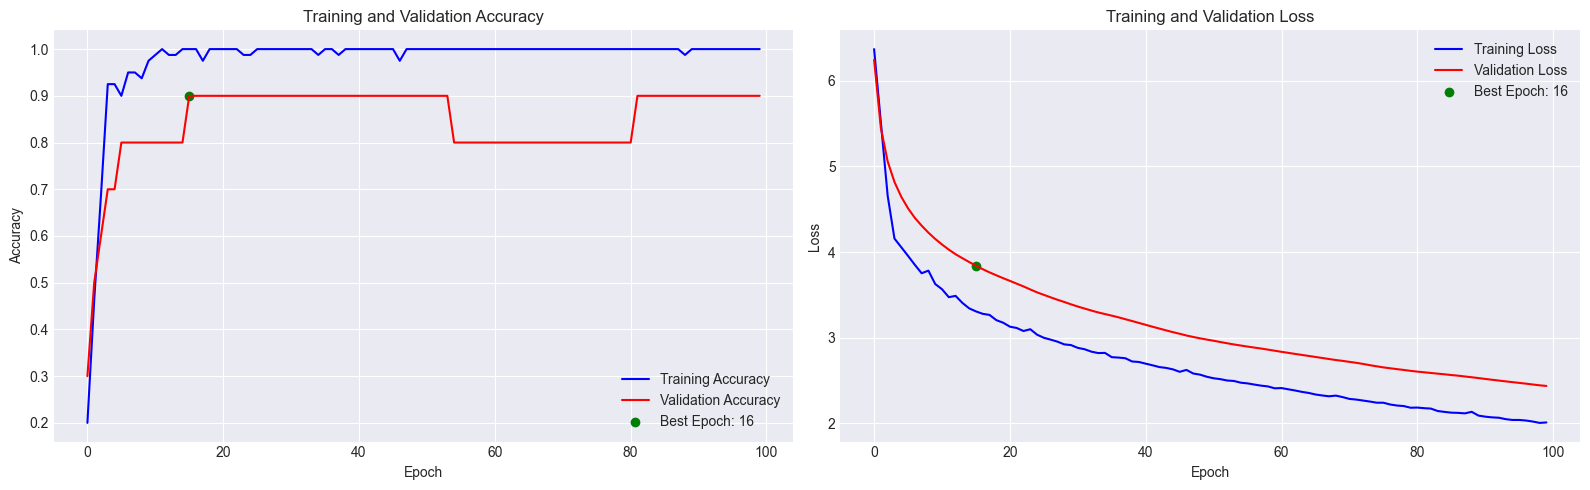

In [36]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 300ms/step


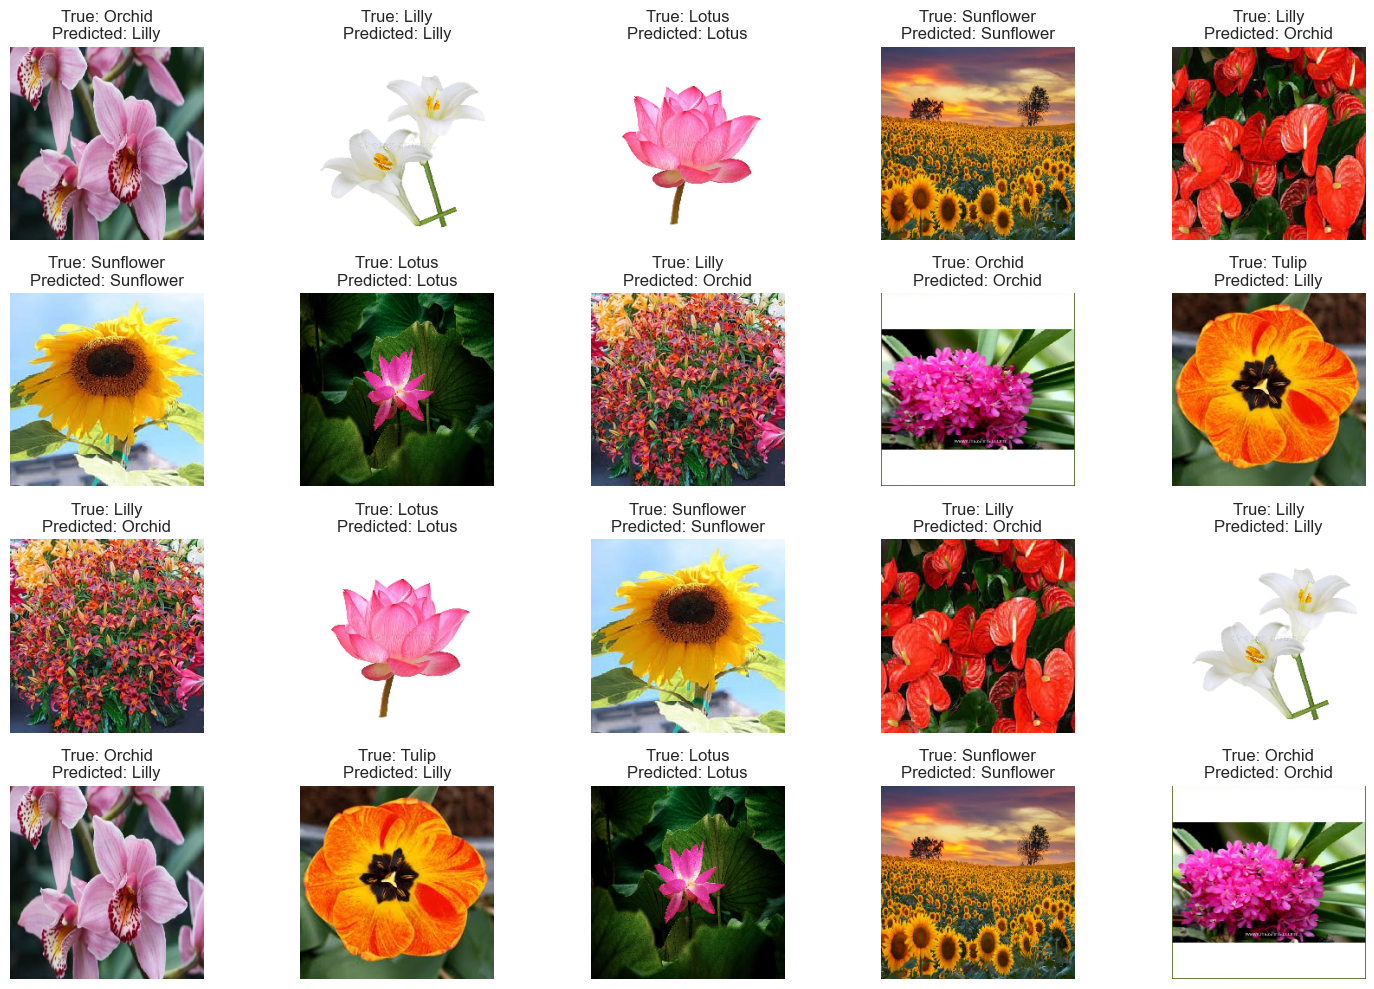

In [37]:
class_labels = list(test_ds.class_indices.keys())

# Predict on each image and plot results
num_images = 20
num_images_per_row = 5  # Set the number of images per row
num_rows = 4

plt.figure(figsize=(15, 10))
for i in range(num_images):
    image, label = next(test_ds)
    predictions = model.predict(image)
    
    # Iterate over each image in the batch
    for j in range(len(image)):
        if i * len(image) + j < num_images:  # Check if the total number of images exceeds the desired count
            predicted_class = class_labels[np.argmax(predictions[j])]
            true_class = class_labels[np.argmax(label[j])]
            
            plt.subplot(num_rows, num_images_per_row, i * len(image) + j + 1)
            plt.imshow(image[j])
            plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
            plt.axis('off')

plt.tight_layout()
plt.show()